# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data

# First find the table\
table = soup.find('table', class_='table')

In [7]:
# Store the table 

# Create blank list to store table row data and headers
all_rows = []
headers = []

# Find each row
rows = table.find_all('tr')

In [34]:
# Loop through all rows and extract data
for row in rows:
    # Extract headers if they exist
    header_row = [th.text.strip() for th in row.find_all('th')]
    # Extract data cells if they exist
    data_row = [td.text.strip() for td in row.find_all('td')]
    
    # If there are headers, save them separately
    if header_row:
        headers = header_row  # Save headers to use as column names later
    # If there are data cells, add them to all_rows
    elif data_row:
        all_rows.append(data_row)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
scraped_df = pd.DataFrame(all_rows, columns= headers)

In [11]:
# Confirm DataFrame was created successfully
scraped_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
scraped_df['terrestrial_date'] = pd.to_datetime(scraped_df['terrestrial_date'], format='%Y-%m-%d')
scraped_df['sol'] = scraped_df['sol'].astype(float)
scraped_df['ls'] = scraped_df['ls'].astype(float)
scraped_df['month'] = scraped_df['month'].astype(int)
scraped_df['min_temp'] = scraped_df['min_temp'].astype(float)
scraped_df['pressure'] = scraped_df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   float64       
 3   ls                1867 non-null   float64       
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), object(1)
memory usage: 94.9+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
mars_months = max(scraped_df['month'])
mars_months

12

In [16]:
# 2. How many sols (Martian days) worth of data are there?
sol_days = len(scraped_df['sol'])
sol_days

1867

In [17]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = scraped_df.groupby('month')['min_temp'].mean().reset_index()
average_min_temp_by_month

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


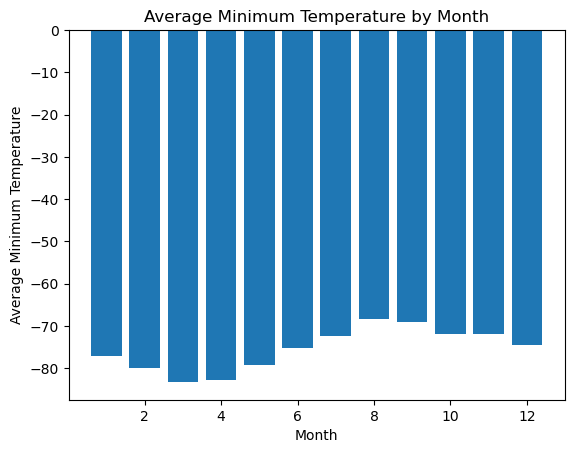

In [18]:
# Plot the average minimum temperature by month
plt.bar(average_min_temp_by_month['month'], average_min_temp_by_month['min_temp'])

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month')

plt.show()

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_df = average_min_temp_by_month.sort_values(by= 'min_temp')

# Reset the index of the DataFrame
sorted_df.reset_index(drop=True, inplace=True)

sorted_df


,month,min_temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


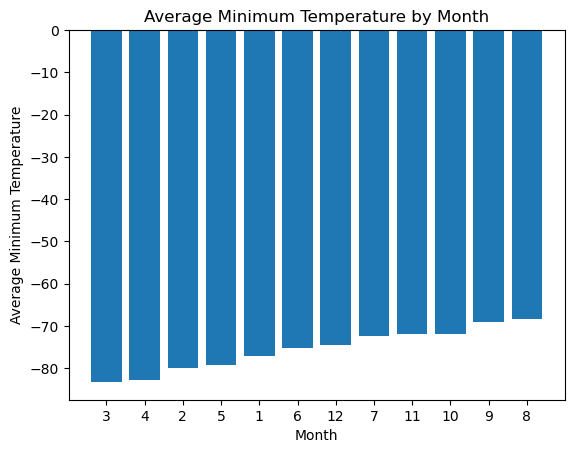

In [30]:
plt.bar(sorted_df['month'].astype(str), sorted_df['min_temp'])

plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.title('Average Minimum Temperature by Month')

plt.show()

In [21]:
# 4. What is the average pressure by month?
average_pressure_by_month = scraped_df.groupby('month')['pressure'].mean().reset_index()
average_pressure_by_month


,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


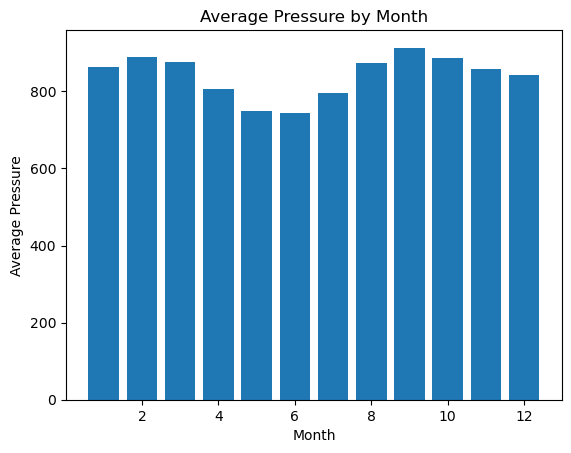

In [22]:
# Plot the average pressure by month
plt.bar(average_pressure_by_month['month'], average_pressure_by_month['pressure'])

plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')

plt.show()

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_sorted_df = average_pressure_by_month.sort_values(by= 'pressure')

# Reset the index of the DataFrame
pressure_sorted_df.reset_index(drop=True, inplace=True)

pressure_sorted_df

,month,pressure
0,6,745.054422
1,5,748.557047
2,7,795.105634
3,4,806.329897
4,12,842.156627
5,11,857.014493
6,1,862.488506
7,8,873.829787
8,3,877.322917
9,10,887.312500


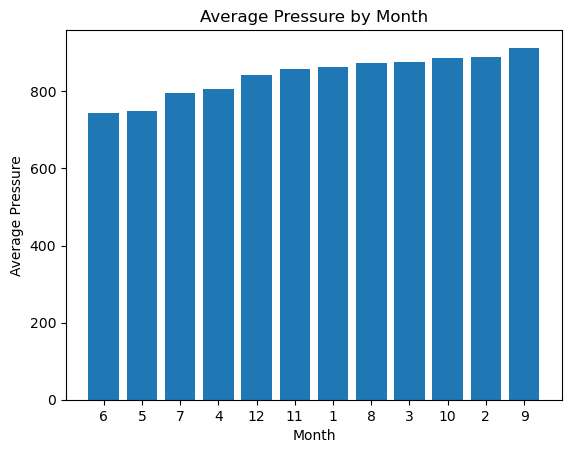

In [24]:
plt.bar(pressure_sorted_df['month'].astype(str), pressure_sorted_df['pressure'])

plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')

plt.show()

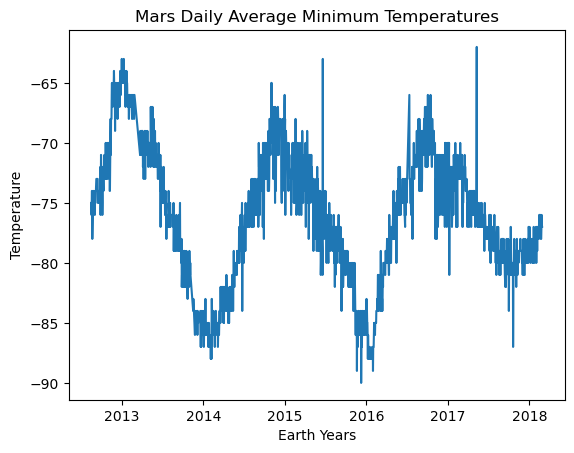

In [31]:
# 5. How many terrestrial (Earth) days are there in a Martian year?


# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(scraped_df['terrestrial_date'], scraped_df['min_temp'])

plt.xlabel('Earth Years')
plt.ylabel('Temperature')
plt.title('Mars Daily Average Minimum Temperatures')

plt.show()

#### Minimum Temperature

The month with the lowest average temperature is 8, and the highest is 3.

#### Atmospheric Pressure

The month with the lowest atmospheric pressure is 6 , and the highest is 9.

#### Year Length

Mars years seem to be around twice as long as Earth years. Presuming the low points average minimum temperature plot represent a Mars winter, it seems like there's a little less than two Earths in-between those low points. I would have to guess there's around 700 Earth days per Mars year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV
scraped_df.to_csv('mars_weather.csv', index=False)

In [27]:
browser.quit()